In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("hf://datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone/FMCSA_CENSUS1_2016Sep_formatted_output.csv")

c:\Users\Kacper\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# e-mail regex
pattern = r'[^@]+@([^@\.]+)\.[^@]+'

# getting the 'user' column, converting to lowercase to make sure there are no inconsistencies
user_column = df['user'].str.lower()

# get all matches
# extractall() is used instead of extract() in case there can be multiple e-mails in a field, can't really hurt
matches = user_column.str.extractall(pattern)

In [4]:
print(matches)
# turns out there is <=1 e-mail address per user

                          0
        match              
1       0            njboom
2       0             ymail
5       0             gmail
6       0      midconetwork
7       0           adamsvs
...                     ...
1048024 0             yahoo
1048186 0          frontier
1048258 0             yahoo
1048371 0           hotmail
1048520 0             gmail

[492492 rows x 1 columns]


<Axes: xlabel='Domain name', ylabel='No. of occurences'>

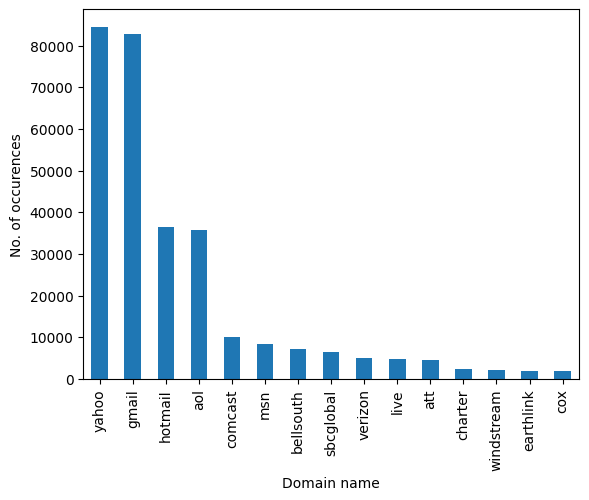

In [5]:
# counting the number of occurences of each domain name
domain_counts = matches[0].dropna().value_counts()

# presenting only 15 most common names for readability
domain_counts_top = domain_counts[:15]
domain_counts_top.plot(kind="bar", xlabel="Domain name", ylabel="No. of occurences")